In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
idx = pd.IndexSlice
warnings.simplefilter(action='ignore', category=FutureWarning)   
from random import seed
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import GradientBoostingRegressor
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import stattools
import hashlib # for grading purposes
from sklearn.model_selection import ParameterGrid

from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
plt.rcParams['figure.figsize'] = (12, 4)

from utils import *

%matplotlib inline

In [3]:
data = pd.read_csv('data/data.csv')
data.sample(5)

,date,variable,value
82,2004-01-04 10:00:00,area_1,15.280
37977,2004-06-01 09:00:00,area_3,80.360
12347,2005-05-29 11:00:00,area_1,NaN
41703,2004-11-03 15:00:00,area_3,72.759
45405,2005-04-06 21:00:00,area_3,85.327


In [4]:
data['date']=pd.to_datetime(data['date'])
data = data.set_index(['date','variable'])
data = data.sort_index()


In [5]:
area1 = data.loc[idx[:,'area_1'],:].reset_index(level='variable',drop=True)
area1 = area1.loc[:area1[area1.value.isnull() == False].iloc[-1].name]
area1.value = area1.value.interpolate()

area2 = data.loc[idx[:,'area_2'],:].reset_index(level='variable',drop=True)
area2 = area2.loc[:area2[area2.value.isnull() == False].iloc[-1].name]
area2.value = area2.value.interpolate()

area3 = data.loc[idx[:,'area_3'],:].reset_index(level='variable',drop=True)
area3 = area3.loc[:area3[area3.value.isnull() == False].iloc[-1].name]
area3.value = area3.value.interpolate()

# area1.head(5)

In [50]:
area1_logged = area2['value'].map(np.log)
area1_logged_diffed = area1_logged.diff()

In [51]:
# best_model = SARIMAX(area1_logged,
#                                       order=(1, 0, 1),
#                                       seasonal_order=(0, 1, 0, 24),
#                                       exog=exo['day_of_week'])

# results = best_model.fit()
# predictions_best_model = results.get_prediction()

In [52]:
# plt.plot(area1[-300:], label='original')
# plt.plot(np.exp(predictions_best_model.predicted_mean[-300:]), label='arima')
# plt.legend()
# plt.show();

In [53]:
# train_1 = area1_logged[:-168]
# test_1 = area1_logged[-168:]

In [54]:
# mae_model = sm.tsa.statespace.SARIMAX(train_1,
#                                       order=(1, 0, 1),
#                                       seasonal_order=(0, 1, 0, 24),
#                                       exog=exo[:-168],
#                                      enforce_stationarity=False,
#                                      enforce_invertibility=False)

# results = mae_model.fit()
# predictions_mae_model = results.get_forecast(steps=168)

In [55]:
# predictions_mae_model = results.get_forecast(steps=168,exog=exo[-168:])

In [56]:
# plt.plot(area1[-300:],label='original')
# plt.plot(np.exp(predictions_mae_model.predicted_mean), label='arima')
# plt.show();

In [57]:
# mean_absolute_percentage_error(area1[-168:],np.exp(predictions_mae_model.predicted_mean))

In [58]:
mae_model = sm.tsa.statespace.SARIMAX(area1_logged,
                                      order=(1, 0, 1),
                                      seasonal_order=(0, 1,0, 24))

results = mae_model.fit()
predictions_mae_model = results.get_forecast(steps=168)

/home/fc/anaconda3/envs/hckt03/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [59]:
area1_pred = np.exp(predictions_mae_model.predicted_mean)

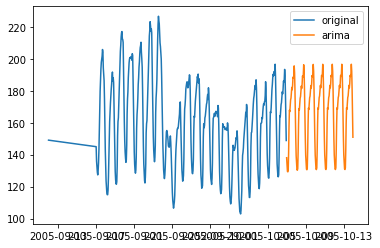

In [61]:
plt.plot(area2[-600:], label='original')
plt.plot(area1_pred[-300:], label='arima')
plt.legend()
plt.show();

In [ ]:
mean_absolute_percentage_error(area1_pred, area1[-168:])

In [ ]:
area1_pred

In [140]:
area1_pred_day = pd.read_csv('daily_area3_pred.csv')
area1_pred_day['Unnamed: 0'] = pd.to_datetime(area1_pred_day['Unnamed: 0'])
area1_pred_day = area1_pred_day.set_index('Unnamed: 0')
#area1_pred_day.resample('H').mean().interpolate()


In [141]:
area1_pred_day = area1_pred_day.resample('H').mean().interpolate()
area1_pred_day = area1_pred_day.reset_index()
area1_pred_day.columns = ['date','value']
area1_pred_day =  area1_pred_day.set_index('date')
area1_pred_day.isnull().sum()

value    0
dtype: int64

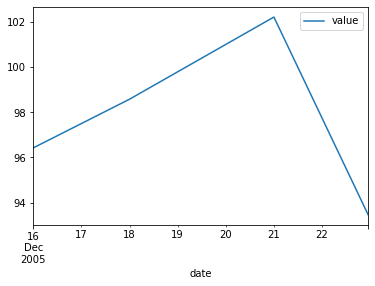

In [148]:
#area1_pred_day #+ 
#pd.DataFrame(area1_pred,columns=['value']).head(5)
area1_pred_day.sort_index().loc['2005-12-16':'2005-12-22'].plot()

In [97]:
area1_pred_day['value'].loc['2005-05-23':'2005-05-30'].tail(5)

date
2005-05-30 19:00:00    14.004643
2005-05-30 20:00:00    13.990995
2005-05-30 21:00:00    13.977347
2005-05-30 22:00:00    13.963699
2005-05-30 23:00:00    13.950051
Name: value, dtype: float64

In [146]:
(area1_pred_day['value'].loc['2005-12-16':'2005-12-22'] + area1_pred.loc['2005-12-16':'2005-12-22'])/2

date
2005-12-16 00:00:00     97.265493
2005-12-16 01:00:00     97.312463
2005-12-16 02:00:00     97.432006
2005-12-16 03:00:00     97.602627
2005-12-16 04:00:00     96.009773
2005-12-16 05:00:00     99.783004
2005-12-16 06:00:00    101.657919
2005-12-16 07:00:00    107.471017
2005-12-16 08:00:00    108.470451
2005-12-16 09:00:00    109.431169
2005-12-16 10:00:00    110.194807
2005-12-16 11:00:00    110.416564
2005-12-16 12:00:00    109.784913
2005-12-16 13:00:00    108.802497
2005-12-16 14:00:00    108.657600
2005-12-16 15:00:00    108.839025
2005-12-16 16:00:00    111.320226
2005-12-16 17:00:00    112.064081
2005-12-16 18:00:00    108.386177
2005-12-16 19:00:00    111.219590
2005-12-16 20:00:00    108.075331
2005-12-16 21:00:00    105.069694
2005-12-16 22:00:00    100.014340
2005-12-16 23:00:00     95.755510
2005-12-17 00:00:00     96.859297
2005-12-17 01:00:00     96.978955
2005-12-17 02:00:00     97.164460
2005-12-17 03:00:00     97.395334
2005-12-17 04:00:00     95.882947
2005-12-1

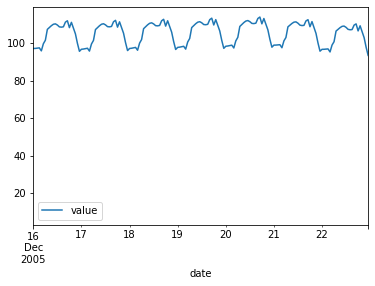

In [147]:
media_dh = (area1_pred_day['value'].loc['2005-12-16':'2005-12-22'] + area1_pred.loc['2005-12-16':'2005-12-22'])/2
pd.DataFrame(media_dh,columns=['value']).plot()
plt.plot(area1[-300:],label='original')
plt.show()

In [149]:
media_dh

date
2005-12-16 00:00:00     97.265493
2005-12-16 01:00:00     97.312463
2005-12-16 02:00:00     97.432006
2005-12-16 03:00:00     97.602627
2005-12-16 04:00:00     96.009773
2005-12-16 05:00:00     99.783004
2005-12-16 06:00:00    101.657919
2005-12-16 07:00:00    107.471017
2005-12-16 08:00:00    108.470451
2005-12-16 09:00:00    109.431169
2005-12-16 10:00:00    110.194807
2005-12-16 11:00:00    110.416564
2005-12-16 12:00:00    109.784913
2005-12-16 13:00:00    108.802497
2005-12-16 14:00:00    108.657600
2005-12-16 15:00:00    108.839025
2005-12-16 16:00:00    111.320226
2005-12-16 17:00:00    112.064081
2005-12-16 18:00:00    108.386177
2005-12-16 19:00:00    111.219590
2005-12-16 20:00:00    108.075331
2005-12-16 21:00:00    105.069694
2005-12-16 22:00:00    100.014340
2005-12-16 23:00:00     95.755510
2005-12-17 00:00:00     96.859297
2005-12-17 01:00:00     96.978955
2005-12-17 02:00:00     97.164460
2005-12-17 03:00:00     97.395334
2005-12-17 04:00:00     95.882947
2005-12-1

In [150]:
media_dh.to_csv('area3_ponderada.csv')

In [ ]:
plt.scatter(area1_pred_day.index,area1_pred_day.values)
plt.plot(area2[:],label='original')
#area1_pred.plot()
plt.show()

In [ ]:
plt.plot(area1[-300:].reset_index(drop=True)['value'],label='original')
pd.read_csv('linear_model_data1.csv')['value'].plot()
plt.show()

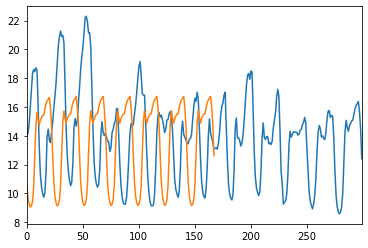

In [16]:
plt.plot(area1[-300:].reset_index(drop=True)['value'],label='original')

area1_pred.reset_index(drop=True).plot()
plt.show()

In [ ]:
area2_pred = np.exp(predictions_mae_model.predicted_mean)


In [ ]:
area2_pred.plot()

In [ ]:
area3_pred = np.exp(predictions_mae_model.predicted_mean)


In [ ]:
area3_pred.plot()

In [ ]:
generate_submission_file(area1_pred,area2_pred,area3_pred)

In [156]:
predictions_area_1 = pd.read_csv('area1_ponderada.csv',header=None).set_index([0])
predictions_area_2 = pd.read_csv('area2_ponderada.csv',header=None).set_index([0])
predictions_area_3 = pd.read_csv('area3_ponderada.csv',header=None).set_index([0])
#test_1 = pd.DataFrame(predictions_area_1)


In [157]:
predicitons_area_3

,1
0,
2005-12-16 00:00:00,97.265493
2005-12-16 01:00:00,97.312463
2005-12-16 02:00:00,97.432006
2005-12-16 03:00:00,97.602627
2005-12-16 04:00:00,96.009773
2005-12-16 05:00:00,99.783004
2005-12-16 06:00:00,101.657919
2005-12-16 07:00:00,107.471017
2005-12-16 08:00:00,108.470451


In [169]:
test_1 = pd.DataFrame(predictions_area_1)
test_2 = pd.DataFrame(predictions_area_2)
test_3 = pd.DataFrame(predicitons_area_3)
test = pd.concat([test_1,test_2,test_3], axis=1)

In [170]:
test.columns = ['area_1','area_2','area_3']
test.index.name = 'date'
test = test.reset_index().melt(id_vars='date',value_vars=['area_1','area_2','area_3']).set_index('date')
test = test.dropna()
test = test.drop('variable',axis=1)
test.to_csv('submission2.csv')

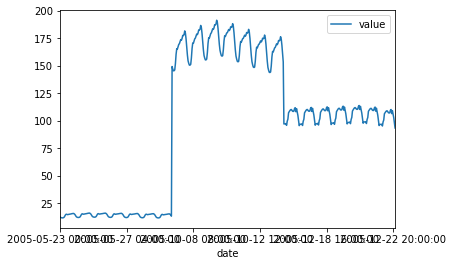

In [172]:
test.plot()